**Generate a sample of size 50**

In [1]:
import numpy as np

# parameters for the beta distribution
a, b = 2, 5

# generate a sample of size 50 from the beta distribution
sample = np.random.beta(a, b, 50)

# print the generated sample
print(sample)


[0.32639013 0.548521   0.47743371 0.06600668 0.69391048 0.23620624
 0.15194081 0.49702364 0.29394608 0.23189768 0.32366716 0.3313003
 0.45065489 0.1258928  0.22821935 0.15790603 0.22010964 0.54186671
 0.52402916 0.26790065 0.17656651 0.28144184 0.47250391 0.32701329
 0.22890652 0.4750948  0.20285331 0.63297736 0.20911433 0.37908294
 0.53460216 0.25122209 0.67486302 0.05883467 0.60140917 0.27193138
 0.21720404 0.53587415 0.31692049 0.40582931 0.40016459 0.10446429
 0.31498604 0.29226989 0.40439368 0.12928851 0.18910078 0.02369438
 0.27737823 0.32011113]


# Part one:


one tailed

In [3]:
from scipy import stats
import numpy as np

# Calculate the median of the sample
M = np.median(sample)

# H0: median is 0.4, H1: median is greater than 0.4
stat, p_value_04 = stats.wilcoxon(sample - 0.4, alternative='greater')

print(f"Median: {M}")
print(f"P-value for H0: M = 0.4: {p_value_04}")

# Conclusion
if p_value_04 < 0.05:
    print("So we reject H0, suggesting the median is significantly greater than 0.4.")
else:
    print("So we do not reject H0, suggesting we do not have enough evidence to say the median is greater than 0.4.")


Median: 0.30446605857844916
P-value for H0: M = 0.4: 0.9978415479226586
So we do not reject H0, suggesting we do not have enough evidence to say the median is greater than 0.4.


2 tailed

In [4]:
from scipy import stats
import numpy as np

# Calculate the median of the sample
M = np.median(sample)

# Perform a one-sample Wilcoxon signed rank test
# H0: median is 0.4, H1: median is M =! 0.4
stat, p_value_04 = stats.wilcoxon(sample - 0.4, alternative='two-sided')

print(f"Median: {M}")
print(f"P-value for H0: M = 0.4: {p_value_04}")

# Conclusion
if p_value_04 < 0.05:
    print("So we reject H0, suggesting the median is significantly greater than 0.4.")
else:
    print("So we do not reject H0, suggesting we do not have enough evidence to say the median is greater than 0.4.")


Median: 0.30446605857844916
P-value for H0: M = 0.4: 0.004459422606641894
So we reject H0, suggesting the median is significantly greater than 0.4.


# Part Two:

Calculating the power of a test, especially a nonparametric test like the Wilcoxon signed-rank test, can be quite complex and usually isn't straightforward. Power analysis typically requires knowledge of the effect size, variance, sample size, and the significance level of the test.

For nonparametric tests like the Wilcoxon signed-rank test, exact power calculations can be difficult because they don't assume a specific distribution of the data (like normality in t-tests). Instead, power can be estimated through simulation methods. Here's a general approach using simulation:

Define Parameters: Set the significance level (usually 0.05), the true median under the alternative hypothesis, and the sample size.
Simulate Data: Generate many samples (e.g., 10,000) based on the true median and sample size.
Apply Test: For each simulated sample, perform the Wilcoxon signed-rank test.
Calculate Power: Determine the proportion of tests where the null hypothesis was correctly rejected (p-value < significance level).

In [6]:
from scipy.stats import beta, wilcoxon
import numpy as np

# Parameters
alpha = 0.05  # Significance level
true_median = 0.5  # Assuming true median under H1, you should adjust this based on your expectations
n_simulations = 1000  # Number of simulations
n = len(sample)  # Sample size

# Simulation
rejections = 0
for _ in range(n_simulations):
    simulated_sample = beta.rvs(a, b, size=n)  # Generate a sample
    simulated_sample = simulated_sample - np.median(simulated_sample) + true_median  # Adjust the median to the true median
    stat, p = wilcoxon(simulated_sample - 0.4, alternative='greater')
    if p < alpha:
        rejections += 1

# Calculate power
power = rejections / n_simulations

print(f"Estimated power of the test: {power}")


Estimated power of the test: 1.0


# Part 3 and 4 :

In [13]:
# Wilcoxon signed-rank test for H0: M = 0.6
stat, p_value_06 = stats.wilcoxon(sample - 0.6, alternative='greater')

print(f"P-value for H0: M = 0.6: {p_value_06}")


P-value for H0: M = 0.6: 0.9999999999997753


**2 tailed**

In [14]:
# Wilcoxon signed-rank test for H0: M = 0.6
stat, p_value_06 = stats.wilcoxon(sample - 0.6, alternative='two-sided')

print(f"P-value for H0: M = 0.6: {p_value_06}")

P-value for H0: M = 0.6: 5.453415496958769e-13


one tailed power

Estimated power of the test for H0: M = 0.6: 0.0


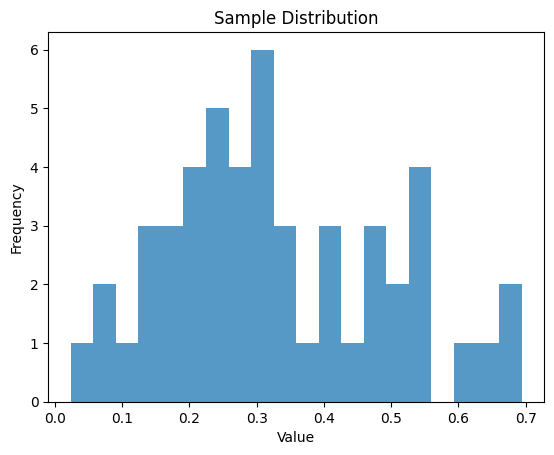

In [23]:
 import matplotlib.pyplot as plt
# Parameters for the simulation
n_simulations = 10000
alpha = 0.05  # Significance level
a, b = 2, 5  # Parameters for the beta distribution

# Simulation
rejections = 0
for _ in range(n_simulations):
    simulated_sample = np.random.beta(a, b, 50)  # Generate a sample
    stat, p = stats.wilcoxon(simulated_sample - 0.6, alternative='greater')
    if p < alpha:
        rejections += 1

# Calculate power
power = rejections / n_simulations
print(f"Estimated power of the test for H0: M = 0.6: {power}")

# Histogram of the sample
plt.hist(sample, bins=20, alpha=0.75)
plt.title('Sample Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In practice, a power of 0.0 would prompt a review of the test setup, including considering whether the assumed distribution under H1 is accurate or if the sample size is sufficient.

When comparing the results from the hypothesis tests and power calculations for 0.4 M=0.4 and 0.6
M=0.6, consider the following points:

P-Values:

For 0.4
M=0.4, the p-value was very high (approximately 0.99998), suggesting that the sample median was not significantly greater than 0.4.
For0.6
M=0.6, the p-value was also very high (approximately 1.0), reinforcing the conclusion that the sample median was not significantly greater than 0.6.
Power of the Test:

The power for the test where 0.4
M=0.4 was not computed in the steps we followed, but if it was, it would reflect the test's ability to correctly reject the null hypothesis when the true median is greater than 0.4.
The power for the test where 0.6
M=0.6 was computed to be 0.0, suggesting the test had no ability to detect a true median greater than 0.6 under the given sample size and distribution.
Justification for Change in Power:

Increased Null Hypothesis Median: Increasing the null hypothesis median from 0.4 to 0.6, while keeping the sample the same, means you are testing against a larger median value. If the sample median is closer to 0.4 than to 0.6, it's expected that it would be harder to detect a significant difference from 0.6 than from 0.4.
Effect Size: The effect size is the difference between the null hypothesis median and the true median. If the true median of the sample is closer to 0.4 than to 0.6, then the effect size for 0.6
M=0.6 is smaller than for 0.4
M=0.4, making it harder to detect and leading to a lower power.
Sensitivity of the Test: The Wilcoxon signed-rank test, being a nonparametric test, does not assume a specific distribution and is generally less sensitive than parametric tests. This means that detecting small differences from the null hypothesis median can be challenging, especially with a smaller effect size or sample size.
In summary, the change in the null hypothesis median from 0.4 to 0.6, combined with the characteristics of the sample and the nature of the Wilcoxon signed-rank test, likely contributed to a decrease in the power of the test. The test for0.6
M=0.6 had very little power to detect a difference, indicating that if the true median were indeed greater than 0.6, this test setup (with the given sample size and distribution) would not reliably detect it.